In [1]:
import numpy as np
import torch
import matplotlib.pyplot as plt
import torch.nn as nn
import os

In [2]:
os.environ['KMP_DUPLICATE_LIB_OK']='True'

In [3]:
torch.manual_seed(1)

In [4]:
def model_train(model, x, y):
    maximum_epoch = 2000
    epoch_arr,loss_arr=[],[]
    not_converged = True
    epoch = 0
    grad_arr = []
    while not_converged:
        epoch += 1
        prediction = model(x)  
        loss = loss_function(prediction, y)
        optimizer.zero_grad() 
        loss.backward() 
        optimizer.step() 
        epoch_arr.append(epoch)
        loss_arr.append(loss.detach().numpy())

        grad_all = 0.0
        for p in model.parameters():
            grad = 0.0
            if p.grad is not None:
                grad = (p.grad.cpu().data.numpy()**2).sum()
            grad_all += grad
        grad_norm = grad_all ** 0.5
        
        grad_arr.append(grad_norm)
        
        if epoch % 100 == 0: 
            print(f'epoch: {epoch}, loss = {loss.item():.4f}')
                
        if epoch == max_epoch:
                print("Max Epoch Reached")
                not_converged = False

        elif (epoch > 5) and  (loss_arr[-1] < 0.001):
            if abs(loss_arr[-3] - loss_arr[-2]) < 1.0e-05 and abs(loss_arr[-2] - loss_arr[-1]) < 1.0e-05:
                print("Convergence reached for loss:",loss_arr[-1])
                not_converged = False
                
    return epoch_arr, loss_arr, prediction, grad_arr

In [5]:
x = np.expand_dims(np.arange(-1.5, 1.5, 0.01),1) 
print(x.shape)
y = (np.sin(5 * (np.pi) * x)) / (5 * np.pi * x)
print(y.shape)

(300, 1)
(300, 1)


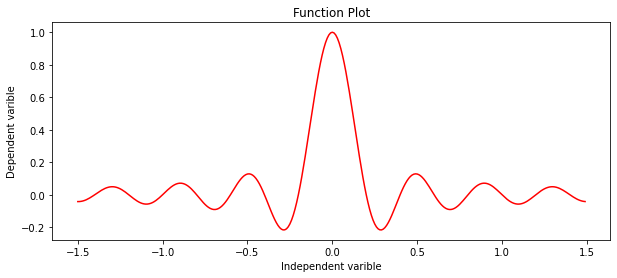

In [6]:
x, y = torch.tensor(x, dtype=torch.float32), torch.tensor(y, dtype=torch.float32)
plt.figure(figsize=(10,4)) 
plt.plot(x, y, color = "red")
plt.title('Function Plot')
plt.xlabel('Independent varible')
plt.ylabel('Dependent varible')
plt.show()

In [7]:
class Model1(nn.Module):
    def __init__(self,):
        super(Model1, self).__init__()
        self.lin1 = nn.Linear(1, 5)
        self.lin2 = nn.Linear(5, 10)
        self.lin3 = nn.Linear(10, 10)
        self.lin4 = nn.Linear(10, 10)
        self.lin5 = nn.Linear(10, 10)
        self.lin6 = nn.Linear(10, 10)
        self.lin7 = nn.Linear(10, 5)
        self.predict = nn.Linear(5, 1)
    def forward(self,x):
        x = nn.functional.leaky_relu(self.lin1(x))
        x = nn.functional.leaky_relu(self.lin2(x))
        x = nn.functional.leaky_relu(self.lin3(x))
        x = nn.functional.leaky_relu(self.lin4(x))
        x = nn.functional.leaky_relu(self.lin5(x))
        x = nn.functional.leaky_relu(self.lin6(x))
        x = nn.functional.leaky_relu(self.lin7(x))
        x = self.predict(x)
        return x
model = Model1()

In [8]:
optimizer = torch.optim.Adam(model.parameters(), lr = 1e-3, weight_decay = 1e-4)
loss_function = torch.nn.MSELoss() 
total_parameters = sum(p.numel() for p in model.parameters())
print(total_parameters)
epoch, loss, predict, gradient = model_train(model, x, y)

571
epoch: 100, loss = 0.0774
epoch: 200, loss = 0.0607
epoch: 300, loss = 0.0524
epoch: 400, loss = 0.0387
epoch: 500, loss = 0.0048
epoch: 600, loss = 0.0030
epoch: 700, loss = 0.0023
epoch: 800, loss = 0.0022
epoch: 900, loss = 0.0022
epoch: 1000, loss = 0.0022
epoch: 1100, loss = 0.0022
epoch: 1200, loss = 0.0022
epoch: 1300, loss = 0.0022
epoch: 1400, loss = 0.0022
epoch: 1500, loss = 0.0022
epoch: 1600, loss = 0.0022
epoch: 1700, loss = 0.0022
epoch: 1800, loss = 0.0022
epoch: 1900, loss = 0.0022
epoch: 2000, loss = 0.0022
Max Epoch Reached


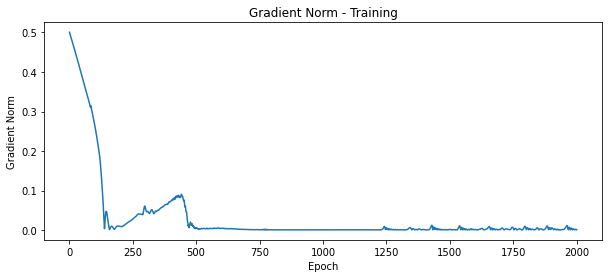

In [9]:
plt.figure(figsize=(10,4))
plt.plot(epoch, gradient)
plt.title('Gradient Norm - Training')
plt.xlabel("Epoch")
plt.ylabel("Gradient Norm")
plt.show()

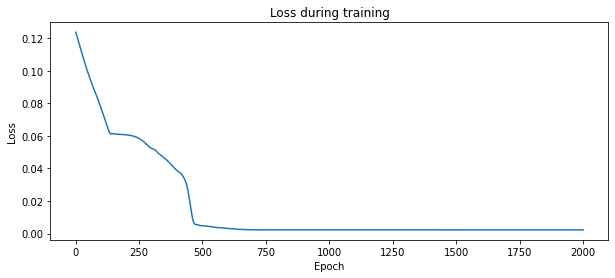

In [10]:
plt.figure(figsize=(10,4))
plt.plot(epoch, loss)
plt.title('Loss during training')
plt.xlabel("Epoch")
plt.ylabel("Loss")
plt.show()

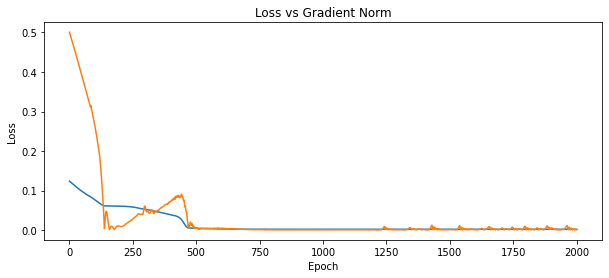

In [11]:
plt.figure(figsize=(10,4))
plt.plot(epoch, loss)
plt.plot(epoch, gradient)
plt.title('Loss vs Gradient Norm')
plt.xlabel("Epoch")
plt.ylabel("Loss")
plt.show()